### In this notebook I shall demonstrate Dimentionality Reduction using Principal Components Analysis(PCA)

**Dataset description**: This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('USArrests.csv')
print(data.shape)
data.head()

(50, 5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']
X = data.loc[:, features].values

Before we do PCA we have to centre and scale the data

In [6]:
# Standardizing the data with StandardScaler

X = StandardScaler().fit_transform(X)

In [7]:
pca = PCA()
principal_components = pca.fit_transform(X)
print(principal_components.shape)

(50, 4)


In [8]:
# Converting the principal components array into a DataFrame

princi_comps = pd.DataFrame(data=principal_components,
                            columns=['Principal Component 1', 'Principal Component 2',
                                     'Principal Component 3', 'Principal Component 4'])
princi_comps.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


In [9]:
# Let's add the State column to the dataframe

princi_comps['State'] = data['State']
princi_comps.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,State
0,0.985566,1.133392,-0.444269,0.156267,Alabama
1,1.950138,1.073213,2.040003,-0.438583,Alaska
2,1.763164,-0.745957,0.054781,-0.834653,Arizona
3,-0.141420,1.119797,0.114574,-0.182811,Arkansas
4,2.523980,-1.542934,0.598557,-0.341996,California


In [10]:
# Calculating the variance explained by the principal components

# Cumulative variance explained
cve = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), index=range(1,5), columns=['Cumulative Variance Explained'])
cve

,Cumulative Variance Explained
1,0.620060
2,0.867502
3,0.956642
4,1.000000


Text(0, 0.5, 'Variance Explained')

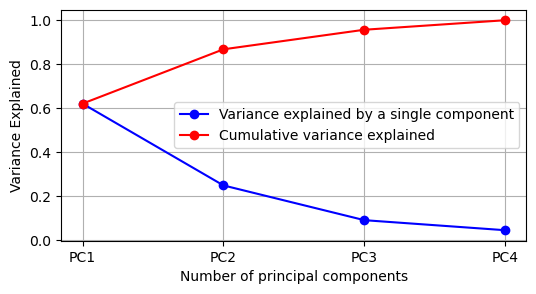

In [11]:
n_pc=4
fig=plt.figure(1, figsize=(6,3))
plt.grid(visible=True, which='major', axis='both')
plt.plot(pca.explained_variance_ratio_, marker='o', color='b')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='r')
plt.xticks([n for n in range(0,n_pc)], [ "PC"+str(n) for n in range(1,n_pc+1)])
plt.legend(["Variance explained by a single component", "Cumulative variance explained"])
plt.xlabel('Number of principal components')
plt.ylabel('Variance Explained')

### We can see that our first two principal components explain the majority of the variance in this dataset: 86.75%